In [1]:
import math
import random
import numpy as np

# =============================
# Constants
# =============================

N = 128
R = 3.442619855899
INV_R = 1.0 / R

# =============================
# Table generation (Doornik)
# =============================

def generate_tables():
    x = [0.0] * (N + 1)
    f = [0.0] * (N + 1)

    x[0] = R
    f[0] = math.exp(-0.5 * R * R)

    for i in range(1, N):
        x[i] = math.sqrt(-2.0 * math.log(
            f[i-1] + (f[i-1] - f[i-2]) / x[i-1] if i > 1 else f[0] * INV_R
        ))
        f[i] = math.exp(-0.5 * x[i] * x[i])

    x[N] = 0.0
    f[N] = 1.0
    return x, f


X, F = generate_tables()

# =============================
# Tail sampler
# =============================

def sample_tail():
    while True:
        x = -math.log(random.random()) * INV_R
        y = -math.log(random.random())
        if 2.0 * y >= x * x:
            return R + x

# =============================
# Ziggurat sampler
# =============================

def ziggurat_gaussian():
    while True:
        i = random.getrandbits(7)  # strip
        u = random.random()
        x = u * X[i]

        if x < X[i + 1]:
            return x if random.getrandbits(1) else -x

        if i == 0:
            x = sample_tail()
            return x if random.getrandbits(1) else -x

        y = F[i] + random.random() * (F[i + 1] - F[i])
        if y < math.exp(-0.5 * x * x):
            return x if random.getrandbits(1) else -x

def ziggurat_rng(samples: int = 500_000, seed: int = 42):
    # rng = random.Random(seed)
    zigg_samples = [ziggurat_gaussian() for _ in range(samples)]
    # mean = np.mean(zigg_samples)
    # var = np.var(zigg_samples)
    return zigg_samples
    print(f"Mean: {mean:.6f}, Var: {var:.6f}")



# if __name__ == "__main__":
#     for i in range(10):
#         seed = np.random.randint(0, 1000000)
#         test_ziggurat(samples=500_000, seed=seed)

(array([49181., 50077., 50081., 50307., 50320., 50526., 50025., 49871.,
        50243., 49369.]),
 array([-4.26362595e+00, -3.41089805e+00, -2.55817016e+00, -1.70544226e+00,
        -8.52714363e-01,  1.35332284e-05,  8.52741430e-01,  1.70546933e+00,
         2.55819722e+00,  3.41092512e+00,  4.26365302e+00]),
 <BarContainer object of 10 artists>)

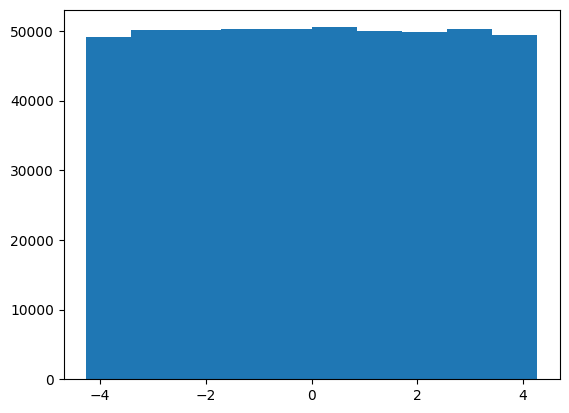

In [2]:
from matplotlib import pyplot as plt

plt.hist(ziggurat_rng())